In [2]:
import pandas as pd

In [3]:
data_exp = pd.read_csv('data_exp_03.csv')
data_gaze = pd.read_csv('data_gaze_03.csv')
data_gaze.head()

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,eye_center0_3d_z,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z
0,-651203.668826,0,0.0,-10.319089,-6.077039,-651203.6688260001-0,-362.755655,96.896623,4.190344,-51.314632,...,-259.008443,0.828141,0.233354,0.509636,NaN,NaN,NaN,NaN,NaN,NaN
1,-651203.658594,0,0.0,-10.319089,-6.077039,-651203.658594-0,-362.755655,96.896623,4.190344,-51.314632,...,-259.008443,0.828141,0.233354,0.509636,NaN,NaN,NaN,NaN,NaN,NaN
2,-651203.652859,1,0.0,-10.319089,-6.077039,-651203.652859-0,-362.755655,96.896623,4.190344,-51.314632,...,-259.008443,0.828141,0.233354,0.509636,NaN,NaN,NaN,NaN,NaN,NaN
3,-651203.644836,1,0.0,-10.319089,-6.077039,-651203.644836-0,-362.755655,96.896623,4.190344,-51.314632,...,-259.008443,0.828141,0.233354,0.509636,NaN,NaN,NaN,NaN,NaN,NaN
4,-651203.636806,1,0.0,-10.319089,-6.077039,-651203.636806-0,-362.755655,96.896623,4.190344,-51.314632,...,-259.008443,0.828141,0.233354,0.509636,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
exp_timestamp = data_exp['etRecord_3.started']
exp_timestamp_clean = exp_timestamp.dropna()
exp_timestamp_clean

2      23.296535
3      29.463154
4      35.696579
5      41.863148
6      48.079518
7      54.213499
8      60.329513
9      66.579275
10     72.712433
11     78.846673
12     85.062383
13     91.162125
14     97.395504
15    103.562027
16    109.712165
17    115.845205
18    121.945081
19    128.061799
20    134.228191
21    140.328136
Name: etRecord_3.started, dtype: float64

In [5]:
first_value = exp_timestamp_clean.iloc[0]  # Get the first value
adjusted_value = [value - first_value for value in exp_timestamp_clean]
new_data = pd.DataFrame({'exp_index': adjusted_value})
new_data

,exp_index
0,0.000000
1,6.166618
2,12.400043
3,18.566612
4,24.782982
5,30.916964
6,37.032978
7,43.282740
8,49.415897
9,55.550138


In [6]:
gaze_timestamp = data_gaze['gaze_timestamp']
first_value = gaze_timestamp.iloc[0]
adjusted_value = [value - first_value for value in gaze_timestamp]
new_data2 = pd.DataFrame({'gaze_stamp': adjusted_value})

In [7]:
new_data2['norm_x'] = data_gaze['norm_pos_x']
new_data2['norm_y'] = data_gaze['norm_pos_y']
new_data2.head()

,gaze_stamp,norm_x,norm_y
0,0.000000,-10.319089,-6.077039
1,0.010232,-10.319089,-6.077039
2,0.015967,-10.319089,-6.077039
3,0.023990,-10.319089,-6.077039
4,0.032020,-10.319089,-6.077039


In [8]:
# Define the time interval for merging (e.g., +/- 1 second)
time_interval = 5.999

# Merge based on time intervals
merged_df = pd.merge_asof(
    new_data2,
    new_data,
    left_on='gaze_stamp',
    right_on='exp_index',
    direction='backward',  # Use 'backward' if you want to find the nearest exp_index value before gaze_stamp
    tolerance=time_interval
)
merged_df

,gaze_stamp,norm_x,norm_y,exp_index
0,0.000000,-10.319089,-6.077039,0.0000
1,0.010232,-10.319089,-6.077039,0.0000
2,0.015967,-10.319089,-6.077039,0.0000
3,0.023990,-10.319089,-6.077039,0.0000
4,0.032020,-10.319089,-6.077039,0.0000
...,...,...,...,...
14547,117.388092,0.479043,0.446299,117.0316
14548,117.396029,0.475641,0.443011,117.0316
14549,117.404106,0.475191,0.446260,117.0316
14550,117.412039,0.468455,0.438913,117.0316


In [9]:
merged_df.to_csv('position_03.csv')

## Confirmation on AOI

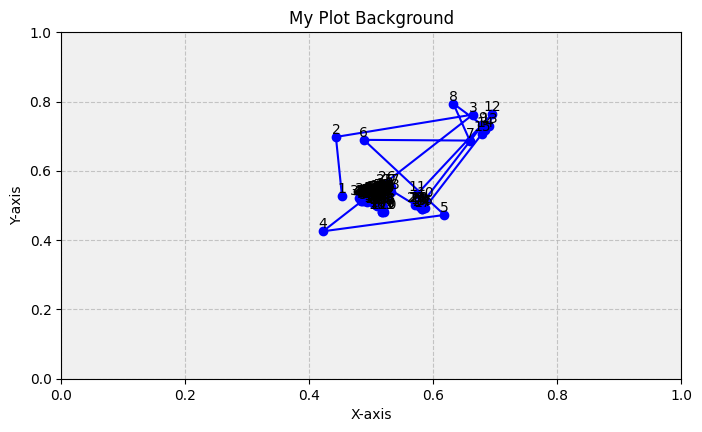

In [17]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 4.5))

# Set the background color
ax.set_facecolor('#f0f0f0')  # You can use any valid HTML color code

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Set axis labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Set plot title
ax.set_title('My Plot Background')

range_init = 10
range_over = 120

ax.set_xlim(0, 1)  # Set fixed X-axis limits
ax.set_ylim(0, 1)  # Set fixed Y-axis limits

x_data = merged_df['norm_x'][range_init:range_over+1]
y_data = merged_df['norm_y'][range_init:range_over+1]

ax.plot(x_data, y_data, label='Eye Tracking Data', color='blue', marker='o')

for i, (x, y) in enumerate(zip(x_data, y_data)):
    ax.text(x, y, str(i+1), ha='center', va='bottom', fontsize=10, color='black')


# Show the plot
plt.show()

## Do something on video

In [11]:
import cv2
import os

# Path to your input video file
video_path = '20230913_02.mp4'

# Output directory to save frames as images
output_directory = 'output_frames/'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the frames per second (FPS) of the video
fps = int(cap.get(cv2.CAP_PROP_FPS))
print(f'video fps: {fps}')

frame_count = 0  # Initialize frame count

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Output every second frame (skip two out of every three frames)
    if frame_count % 3 == 0:
        # Save the frame as an image
        frame_filename = os.path.join(output_directory, f'frame_{frame_count // 3:04d}.jpg')
        cv2.imwrite(frame_filename, frame)

    frame_count += 1

# Release the video capture
cap.release()


video fps: 29


In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pandas as pd

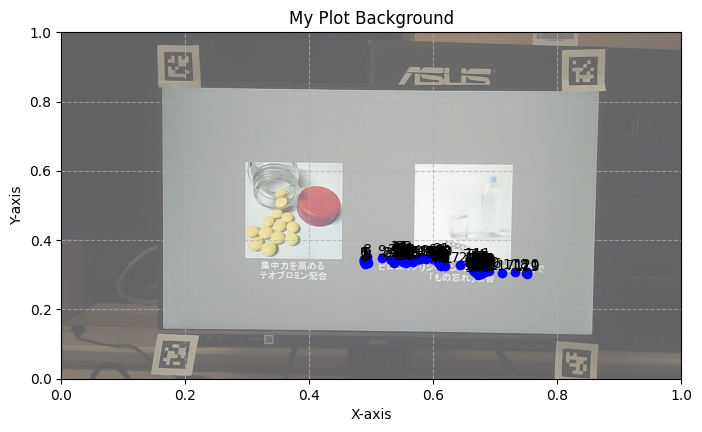

In [20]:
# Load your gaze data and timestamps from your DataFrame
merged_df = merged_df.copy()

# Define the list of seconds you want to display
display_second = 3  # Adjust this list as needed

range_init = display_second * 120
range_over = range_init + 120

# Extract relevant columns
timestamps = merged_df['gaze_stamp']

x_data = merged_df['norm_x'][range_init:range_over+1]
y_data = merged_df['norm_y'][range_init:range_over+1]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 4.5))

# Set the background color
ax.set_facecolor('#f0f0f0')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Set axis labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Set plot title
ax.set_title('My Plot Background')

# Set fixed X-axis and Y-axis limits (adjust as needed)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Scatter plot your gaze data
ax.scatter(x_data, y_data, label='Eye Tracking Data', color='blue', marker='o')

for i, (x, y) in enumerate(zip(x_data, y_data)):
    ax.text(x, y, str(i+1), ha='center', va='bottom', fontsize=10, color='black')

# Load and overlay images based on selected seconds
opacity = 0.6
image_directory = 'output_frames/'  # Directory containing your saved images

frame_start = display_second * 10  # Assuming 10 frames per second
frame_end = frame_start + 10

""""
 for frame_number in range(frame_start, frame_end):
    image_filename = os.path.join(image_directory, f'frame_{frame_number:04d}.jpg')
    
    if os.path.exists(image_filename):
        # Load and display the image as a background with lower opacity
        img = mpimg.imread(image_filename)
        ax.imshow(img, extent=(0, 1, 0, 1), aspect='auto', zorder=-1, alpha=opacity)
"""
        
display_frame = display_second * 10
image_filename = os.path.join(image_directory, f'frame_{display_frame:04d}.jpg')
if os.path.exists(image_filename):
    # Load and display the image as a background with lower opacity
    img = mpimg.imread(image_filename)
    ax.imshow(img, extent=(0, 1, 0, 1), aspect='auto', zorder=-1, alpha=opacity)

# Show the plot
plt.show()